In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import networkx as nx
from collections import Counter
import time
import sys
from random import randrange
from datetime import timedelta
import datetime
import os

In [2]:
print("Python version - ",sys.version_info)

Python version -  sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


In [3]:
start=time.clock()
col_names = ['Caller','Callee', 'Duration']
calls = pd.read_csv('C:/Users/sumith.singh/A_SUBEX/Diffusion/data/sumit_onnet.csv',header=None, names = col_names, dtype={"Caller": object, "Callee": object, "Duration": object})
print("Time taken to read the csv file = ",time.clock() - start)

Time taken to read the csv file =  4.69171442857435


In [4]:
calls1 = calls[['Caller','Callee']]
print("Time taken to get two columns from the csv file = ",time.clock() - start)
print(calls1.sample(5));

Time taken to get two columns from the csv file =  16.348442598614497
               Caller        Callee
2999083  254770094516  254775795124
2878916  254776833662  254776833794
534193   254771692055  254776551745
2370926  254775514198  254775514250
2960861  254772245507  254776288285


In [5]:
print("Any values null in calls ? -> ",calls1.isnull().values.any())

Any values null in calls ? ->  False


In [6]:
calls1.dropna()
#calls2.shape
print("Time taken to get to drop nas = ",time.clock() - start)
print("Any values null in calls ? -> ",calls1.isnull().values.any())

Time taken to get to drop nas =  34.46328486266645
Any values null in calls ? ->  False


In [7]:
Node1 = calls1.Caller
Node2 = calls1.Callee
#type(Node1)

In [8]:
print("The size of callers - ",Node1.size)
print("The size of callees - ",Node2.size)

Node = pd.concat([Node1,Node2]).reset_index(drop=True).unique()
print("The size of caller+callee - ",Node.size)
print("Time taken to concat+unique callers and callee ->",time.clock()-start)


The size of callers -  3003910
The size of callees -  3003910
The size of caller+callee -  1210508
Time taken to concat+unique callers and callee -> 45.880648475885614


In [9]:
G = nx.Graph()
k = len(calls)
k2 = len(calls1)
G.add_edges_from(zip(Node1,Node2))
print("Time take to calculate the Graph =========>",time.clock()-start)
print("Neighbours of node 254771980130 are - ",list(G.neighbors('254771980130')))
print("Time take to calculate neighbours of a given node =====>",time.clock()-start)
max_nbrs = 0
max_node = 0

Time take to calculate the Graph =========> 68.60847718324281
Neighbours of node 254771980130 are -  ['254775770755', '254776442060']
Time take to calculate neighbours of a given node =====> 68.60886153525001


In [10]:
for element in G.nodes():
    if len(list(G.neighbors(element))) > max_nbrs:
        max_nbrs = len(list(G.neighbors(element)))
        max_node = element
print("The node with maximum number of neighbor is: ", max_node)
print("The neighbors are: ", list(G.neighbors(max_node)))
print("The number of neighbors is: ", len(list(G.neighbors(max_node))))
print("Time taken to get node with maximum number of neighbors =======>",time.clock()-start)

degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
deg_cent = nx.degree_centrality(G)
print("Time taken to find degree centrality of all nodes ====>",time.clock()-start)




#plt.scatter(degrees, list(deg_cent.values()))
#plt.show()


The node with maximum number of neighbor is:  254202221000
The neighbors are:  ['254770309452', '254770634250', '254770767708', '254771198894', '254771357694', '254771440178', '254771771307', '254772297362', '254772319948', '254772423899', '254772538252', '254772910590', '254773013545', '254773037826', '254773053909', '254773088952', '254773498201', '254773519962', '254773690857', '254773770184', '254774200001', '254774513416', '254774727537', '254774861435', '254775018773', '254775291827', '254775546560', '254775615161', '254775752625', '254775786737', '254775953833', '254776062248', '254776093205', '254776102488', '254776385322', '254776408014', '254776466031', '254776591481', '254776643655', '254776673437', '254776699664', '254776881441', '254776890475', '254776927780', '254776931309', '254202641038', '254207855088', '254770136098', '254770431187', '254770559437', '254770580648', '254770665154', '254770779067', '254770785895', '254771381352', '254771786201', '254771889128', '2547720

Time taken to find degree centrality of all nodes ====> 75.0732328094157


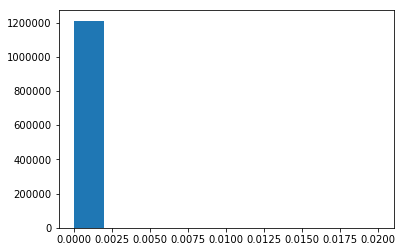

In [11]:
plt.hist(list(deg_cent.values()))
plt.show()

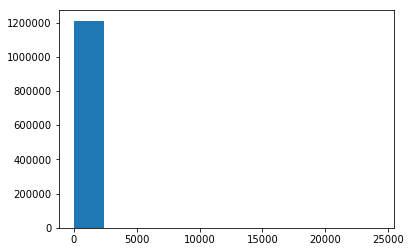

In [12]:
plt.hist(degrees)
plt.show()

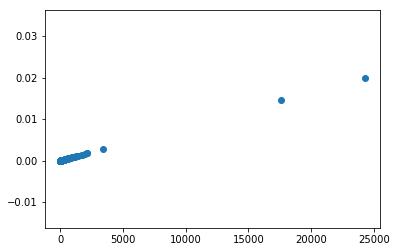

In [13]:
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

In [14]:
end=time.clock()
def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

In [15]:
#nodes = Node
#len(nodes)
#nodes[98]

d1A = datetime.datetime.strptime('1/1/2016 1:30 PM', '%m/%d/%Y %I:%M %p')
d2A = datetime.datetime.strptime('1/13/2016 4:50 AM', '%m/%d/%Y %I:%M %p')
d1B = datetime.datetime.strptime('3/1/2017 1:30 PM', '%m/%d/%Y %I:%M %p')
d2B = datetime.datetime.strptime('3/13/2017 4:50 AM', '%m/%d/%Y %I:%M %p')
d1C = datetime.datetime.strptime('5/1/2018 1:30 PM', '%m/%d/%Y %I:%M %p')
d2C = datetime.datetime.strptime('5/13/2018 4:50 AM', '%m/%d/%Y %I:%M %p')
print("Random date =",random_date(d1A, d2A))

def set_time(df):
	return random_date(d1A,d2A);

def set_prob(df):
	return np.random.random();

# First DF Creation
#Node # Tel Directory

Random date = 2016-01-11 17:09:58


In [16]:
cols = ['Behavior', 'Node', 'Time', 'Prob']
print("Type of Node -",type(Node))
print("Length of Node -",len(Node))
dtypes={"Behavior": "str", "Node": "str", "Time": "datetime64[ns]", "Prob": "float64"}
df2 = pd.DataFrame(columns=cols)
for k,v in dtypes.items():
	df2[k] = df2[k].astype(v)
print(df2.shape)
print(df2.dtypes)
df2['Node']=Node
df2['Behavior']='A'
df2['Time']=df2.apply(set_time,axis=1)
df2['Prob']=df2.apply(set_prob,axis=1)
print("Head of DF2===>\n",df2.head())
print("Time taken to form DataFrame df2 (Behaviour, Node, Time, Prob) ===>",time.clock()-start)
#for j in range(df2.shape[0]):
#    df2.loc[j].Time = random_date(d1A,d2A)
#    df2.loc[j].Prob = round(Behav_Prob[j],2)
#Behav_Prob
print("Sample of df2 - \n",df2.sample(5))
print("The total count is - ",df2.count())
print("The count of less than 0.5 probability is: ",df2[df2.Prob<0.5].count())
print("The count of greater than 0.5 probability is: ",df2[df2.Prob>0.5].count())
print("The count of  equal to 0.5 probability is: ",df2[df2.Prob==0.5].count())
print("The unique behaviour is - ",df2.Behavior.unique())
print("Time to calculate above calculation on df2 ===>",time.clock()-start)
#df2.sample(5)

Type of Node - <class 'numpy.ndarray'>
Length of Node - 1210508
(0, 4)
Behavior            object
Node                object
Time        datetime64[ns]
Prob               float64
dtype: object
Head of DF2===>
   Behavior          Node                Time      Prob
0        A  254202002516 2016-01-04 12:04:56  0.276967
1        A  254202019758 2016-01-04 09:34:07  0.022057
2        A  254202045504 2016-01-09 00:25:26  0.681891
3        A  254202050111 2016-01-08 11:18:49  0.893872
4        A  254202052628 2016-01-05 18:11:33  0.752167
Time taken to form DataFrame df2 (Behaviour, Node, Time, Prob) ===> 1247.3687913927718
Sample of df2 - 
         Behavior          Node                Time      Prob
213544         A  254774040753 2016-01-10 04:05:28  0.375029
1113984        A  254770214965 2016-01-08 03:45:36  0.150515
561662         A  254776766019 2016-01-05 17:45:10  0.387173
948874         A  254770120345 2016-01-07 07:55:54  0.461454
1069361        A  254771717778 2016-01-04 00:48:44

In [17]:
df2 = df2.drop(df2[df2.Prob < 0.5].index)
#range(df2.shape[1])
#df2.shape
df2.reset_index(inplace=True)
df2.drop(columns='index', inplace=True)
#df2.sample(5)
df3 = df2.groupby('Behavior')['Time'].min()
print("Time taken to form df3 by groupby time min on df2 ==========>",time.clock()-start)
#df3
def get_min(df):
    if df['Behavior'] == 'A' :
        return df3['A']
    elif df['Behavior'] == 'B' :
        return df3['B']
    else :
        return df3['C']

Time taken to form df3 by groupby time min on df2 ==========> 1249.4090982819819


In [18]:
df2['min'] = df2.apply(get_min, axis=1)
df2['Time'] =  pd.to_datetime(df2['Time'], format='%m/%d/%Y %I:%M %p')
print(df2.info())
print("Sample of df2 - \n",df2.sample(5))
print("Time take to get get_min fucntion run on df2 ====>",time.clock()-start)

# # Lag Creation
#df2['Time'] =  pd.to_datetime(df2['Time'], format='%d%b%Y:%H:%M:%S.%f')
df2['lag'] = (df2['Time'] - df2['min'])
df2['lag2'] = 0
df2.reset_index(inplace=True)
df2.drop(columns='index', inplace=True)

def lag_days(df):
	return df.lag.days;

df2['lag2'] = df2.apply(lag_days,axis=1)
print("Sample of df2 after lag -\n",df2.sample(5))
print("Time taken to lag calculation on df2 ======>",time.clock()-start)


# # Neighbors & Degree Centrality Creation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605395 entries, 0 to 605394
Data columns (total 5 columns):
Behavior    605395 non-null object
Node        605395 non-null object
Time        605395 non-null datetime64[ns]
Prob        605395 non-null float64
min         605395 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 23.1+ MB
None
Sample of df2 - 
        Behavior          Node                Time      Prob  \
184301        A  254770300099 2016-01-10 10:15:55  0.605991   
356942        A  254771091419 2016-01-04 00:38:14  0.569768   
254003        A  254775956323 2016-01-05 02:17:56  0.604834   
113560        A  254775879824 2016-01-12 07:54:17  0.974836   
309176        A  254771760459 2016-01-06 11:17:24  0.660993   

                       min  
184301 2016-01-01 13:30:01  
356942 2016-01-01 13:30:01  
254003 2016-01-01 13:30:01  
113560 2016-01-01 13:30:01  
309176 2016-01-01 13:30:01  
Time take to get get_min fucntion run on df2 ====>

In [19]:
print("Sample of df2 after lag -\n",df2.sample(5))
print("Time taken to lag calculation on df2 ======>",time.clock()-start)

df2['Neighbors'] = df2.apply(lambda row: list(G.neighbors(row.Node)), axis = 1);
df2['Deg_Cntrlty'] = df2.apply(lambda row: deg_cent[row.Node], axis = 1)
print("Sample of df2 after calculating Neighbors and Degree_Centrality -\n",df2.sample(5))
print("Time taken to calculate df2.Neighbors and df2.deg_centrality on df2 ======>",time.clock()-start)

df2['relation']=''
df2['ratio']=0.0
df2['inflncr_scr'] = 0
df2['high_nbrs'] = ''



Sample of df2 after lag -
        Behavior          Node                Time      Prob  \
34651         A  254776879045 2016-01-02 22:49:39  0.990482   
255212        A  254771201078 2016-01-12 23:33:03  0.523677   
132516        A  254776371406 2016-01-11 04:35:40  0.584520   
218608        A  254773242777 2016-01-04 14:06:39  0.717398   
484044        A  254776012323 2016-01-02 07:42:55  0.722251   

                       min              lag  lag2  
34651  2016-01-01 13:30:01  1 days 09:19:38     1  
255212 2016-01-01 13:30:01 11 days 10:03:02    11  
132516 2016-01-01 13:30:01  9 days 15:05:39     9  
218608 2016-01-01 13:30:01  3 days 00:36:38     3  
484044 2016-01-01 13:30:01  0 days 18:12:54     0  
Time taken to lag calculation on df2 ======> 1453.0662612281915


ValueError: Shape of passed values is (605395, 32), indices imply (605395, 7)

In [20]:
def apply_high_nbrs(row):
	max_deg = sorted([deg_cent[i] for i in row.Nbrs])[-1]
	return [x for x in row.Nbrs if deg_cent[x]==max_deg]

def apply_relation_df2B_Diff_Algo2(row):
    return [x for x in row.Nbrs if x in diffused_list]  

def apply_relation_df2C_Diff_Algo2(row):
    return [x for x in row.Nbrs if df2C_Diff_Algo2.Day[df2C_Diff_Algo2.Node == x].values <= row.Day]  

def apply_high_diffsd_df2B_Diff_Algo2(row):
    return [x for x in row.high_nbrs if x in diffused_list]

def apply_high_diffsd_df2C_Diff_Algo2(row):
    return [x for x in row.high_nbrs if df2C_Diff_Algo2.Flag[df2C_Diff_Algo2.Node == x].values == 'Diffused']

In [21]:
cols = ['Behavior', 'Node','Day', 'Flag','Nbrs', 'Num_Nbrs','Nbrs_Dffsed', 'Num_Nbrs_Dffsd','high_nbrs','high_nbr_diff',
        'Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm']

df2B_Diff_Algo2 = pd.DataFrame(columns=cols, index=range(len(Node)))   # 100 need not be put in a afile. It will be modified once we have an external data source
df2B_Diff_Algo2.Behavior = 'B'
df2B_Diff_Algo2.Node = Node
df2B_Diff_Algo2.Nbrs = df2B_Diff_Algo2.apply(lambda row: list(G.neighbors(row.Node)), axis = 1);
df2B_Diff_Algo2.Num_Nbrs = df2B_Diff_Algo2.apply(lambda row: len(row.Nbrs), axis = 1)
#df2B_Diff_Algo2.high_nbrs = df2B_Diff_Algo2.apply(lambda row: [], axis = 1)
df2B_Diff_Algo2.high_nbr_diff = 0
df2B_Diff_Algo2.Deg_Ctrlty = df2B_Diff_Algo2.apply(lambda row: deg_cent[row.Node], axis = 1)
df2B_Diff_Algo2.Probability = df2B_Diff_Algo2.apply(lambda row: np.random.random(), axis = 1)
df2B_Diff_Algo2.Flag = df2B_Diff_Algo2.apply(lambda row: 'Resistant' if row.Probability<0.1 else ('Diffused' if row.Probability>0.9 else 'Not Diffused'), axis = 1)
df2B_Diff_Algo2.Day = df2B_Diff_Algo2.apply(lambda row: 1 if row.Flag=='Diffused' else 100, axis = 1) 
df2B_Diff_Algo2.ratio = 0.0
df2B_Diff_Algo2.tcudorp = 0.0
df2B_Diff_Algo2.knar = 0
df2B_Diff_Algo2.knar_norm = 0

print("Sample of df2B_Diff_Algo2 -\n",df2B_Diff_Algo2.sample(5))
print("Time taken to calculate df2B_Diff_Algo2 df ======>",time.clock()-start)

Sample of df2B_Diff_Algo2 -
        Behavior          Node  Day          Flag  \
741628        B  254770795241  100  Not Diffused   
625157        B  254772944914  100  Not Diffused   
468783        B  254774460109  100  Not Diffused   
437443        B  254773575037  100  Not Diffused   
730278        B  254772718502  100  Not Diffused   

                                                     Nbrs  Num_Nbrs  \
741628                                     [254770795236]         1   
625157  [254774838990, 254774274388, 254771950928, 254...         4   
468783  [254771511057, 254774190146, 254771310365, 254...         5   
437443                       [254774555773, 254772285080]         2   
730278                       [254770263160, 254771807793]         2   

       Nbrs_Dffsed Num_Nbrs_Dffsd high_nbrs  high_nbr_diff    Deg_Ctrlty  \
741628         NaN            NaN       NaN              0  8.261001e-07   
625157         NaN            NaN       NaN              0  3.304401e-06   
468

In [22]:
cols = ['Behavior', 'Node','Day', 'Flag','Nbrs', 'Num_Nbrs','Nbrs_Dffsed', 'Num_Nbrs_Dffsd','high_nbrs','high_nbr_diff',
        'Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm']
df2C_Diff_Algo2 = pd.DataFrame(columns=cols, index=range(len(Node)))   # 100 need not be put in a afile. It will be modified once we have an external data source
df2C_Diff_Algo2.Behavior = 'C'
df2C_Diff_Algo2.Node = Node
df2C_Diff_Algo2.Nbrs = df2C_Diff_Algo2.apply(lambda row: list(G.neighbors(row.Node)), axis = 1);
df2C_Diff_Algo2.Num_Nbrs = df2C_Diff_Algo2.apply(lambda row: len(row.Nbrs), axis = 1)
#df2C_Diff_Algo2.high_nbrs = df2C_Diff_Algo2.apply(lambda row: [], axis = 1)
df2C_Diff_Algo2.high_nbr_diff = 0
df2C_Diff_Algo2.Deg_Ctrlty = df2C_Diff_Algo2.apply(lambda row: deg_cent[row.Node], axis = 1)
df2C_Diff_Algo2.Probability = df2C_Diff_Algo2.apply(lambda row: np.random.random(), axis = 1)
df2C_Diff_Algo2.Flag = df2C_Diff_Algo2.apply(lambda row: 'Resistant' if row.Probability<0.1 else ('Diffused' if row.Probability>0.9 else 'Not Diffused'), axis = 1)
df2C_Diff_Algo2.Day = df2C_Diff_Algo2.apply(lambda row: 1 if row.Flag=='Diffused' else 100, axis = 1) 
df2C_Diff_Algo2.ratio = 0.0
df2C_Diff_Algo2.tcudorp = 0.0
df2C_Diff_Algo2.knar = 0
df2C_Diff_Algo2.knar_norm = 0

print("Sample of df2C_Diff_Algo2 -\n",df2B_Diff_Algo2.sample(5))
print("Time taken to calculate df2C_Diff_Algo2 df ======>",time.clock()-start)


Sample of df2C_Diff_Algo2 -
         Behavior          Node  Day          Flag  \
153721         B  254772509424  100     Resistant   
77836          B  254773309382  100  Not Diffused   
1179352        B  254775095102  100  Not Diffused   
376029         B  254776346550  100  Not Diffused   
49956          B  254774435413  100  Not Diffused   

                                                      Nbrs  Num_Nbrs  \
153721          [254774023314, 254770000423, 254772509424]         3   
77836                         [254771250955, 254774818826]         2   
1179352                                     [254774011038]         1   
376029   [254776481800, 254773930321, 254774971271, 254...         5   
49956    [254772994644, 254771517179, 254776743662, 254...         8   

        Nbrs_Dffsed Num_Nbrs_Dffsd high_nbrs  high_nbr_diff    Deg_Ctrlty  \
153721          NaN            NaN       NaN              0  3.304401e-06   
77836           NaN            NaN       NaN              0  1.65

In [23]:
df2B_Diff_Algo2.high_nbrs = df2B_Diff_Algo2.apply(apply_high_nbrs, axis = 1)
df2B_Diff_Algo2.sample(5)
print("Time taken to calculate the high_nbrs for df2B_Diff_Algo2 ===>",time.clock()-start)

Time taken to calculate the high_nbrs for df2B_Diff_Algo2 ===> 2758.263039582615


In [24]:
start = time.clock()
diffused_list = set(df2B_Diff_Algo2.Node[df2B_Diff_Algo2.Flag == "Diffused"])
print("Time taken to get list of diffused nodes -",time.clock()-start)

Time taken to get list of diffused nodes - 0.14456466317005834


In [25]:
dir(diffused_list)

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']

In [ ]:
#df2B_Diff_Algo2.Nbrs_Dffsed = df2B_Diff_Algo2.apply(apply_relation_df2B_Diff_Algo2, axis = 1)
#import time
start = time.clock()
NumDays = 11

for i in range(1, NumDays):
    print("Calculating for day",i,"---")
    df2B_Diff_Algo2.Nbrs_Dffsed = df2B_Diff_Algo2.apply(apply_relation_df2B_Diff_Algo2, axis = 1)
    print("Done with nbrs_diffused in - ",time.clock()-start)
    df2B_Diff_Algo2.Num_Nbrs_Dffsd = df2B_Diff_Algo2.apply(lambda row: len(row.Nbrs_Dffsed), axis = 1)
    print("Done with num_nbrs_diffused in - ",time.clock()-start)
    df2B_Diff_Algo2.high_nbr_diff = df2B_Diff_Algo2.apply(apply_high_diffsd_df2B_Diff_Algo2, axis = 1)
    print("Done with high_nbrs_diffused in - ",time.clock()-start)
    df2B_Diff_Algo2.ratio = df2B_Diff_Algo2.apply(lambda row: row.Num_Nbrs_Dffsd/row.Num_Nbrs, axis = 1)
    print("Done with ratio in - ",time.clock()-start)
    df2B_Diff_Algo2.tcudorp = df2B_Diff_Algo2.apply(lambda row: row.ratio*deg_cent[row.Node]*row.Probability*len(row.high_nbrs), axis = 1)
    print("Done with tcudorp in - ",time.clock()-start)
    df2B_Diff_Algo2['knar'] = df2B_Diff_Algo2.tcudorp[df2B_Diff_Algo2['Flag']=='Not Diffused'].rank(ascending=True)
    print("Done with knar in - ",time.clock()-start)
    count_not_diff = Counter(df2B_Diff_Algo2['Flag'])['Not Diffused']
    print("Done with count_not_diff in - ",time.clock()-start)
    df2B_Diff_Algo2.knar_norm = df2B_Diff_Algo2.apply(lambda row: row.knar/count_not_diff if count_not_diff!=0 else 1, axis = 1)
    print("Done with knar_norm in - ",time.clock()-start)
    df2B_Diff_Algo2.Flag = df2B_Diff_Algo2.apply(lambda row: 'Diffused' if row.knar_norm<0.15 else row.Flag, axis = 1)
    print("Done with flag in - ",time.clock()-start)
    df2B_Diff_Algo2.Day = df2B_Diff_Algo2.apply(lambda row: i if row.knar_norm<0.15 else row.Day, axis = 1)
    print("Done with day in - ",time.clock()-start)
    diffused_list.update(df2B_Diff_Algo2.Node[df2B_Diff_Algo2.Flag=="Diffused"].values)
    print("Done with diffused_list.update in - ",time.clock()-start)
    print("Time taken for calculation for day",i," ===>",time.clock()-start)

print("df2B_Diff_Algo2 sample - \n",df2B_Diff_Algo2.sample(5))
print("Time taken finally ========================>",time.clock()-start)



In [ ]:

#df2B_Diff_Algo2.sample(5)

#df2B_Diff_Algo2.groupby(["Flag"]).size()

#df2C_Diff_Algo2.groupby(["Flag"]).size()

#df2A.shape

#df2A

## ### Trimming of the Tables

#df2A_trimmed = df2A
#df2A_trimmed.drop(columns=['Time','min','lag','Neighbors','Deg_Cntrlty','relation','ratio'], inplace=True)
#df2A_trimmed.sample(5)

#df2B_Diff_Algo2_Trim = df2B_Diff_Algo2
#df2B_Diff_Algo2_Trim.drop(columns=['Flag','Nbrs','Num_Nbrs','Nbrs_Dffsed','Num_Nbrs_Dffsd','Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm'], inplace=True)
#df2B_Diff_Algo2_Trim.sample(5)

#df2C_Diff_Algo2_Trim = df2C_Diff_Algo2
#df2C_Diff_Algo2_Trim.drop(columns=['Flag','Nbrs','Num_Nbrs','Nbrs_Dffsed','Num_Nbrs_Dffsd','Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm'], inplace=True)
#df2C_Diff_Algo2_Trim.sample(5)

#weights = pd.read_csv("GOF_Weight.csv", index_col=False, header=0)
#TP = (weights.loc[weights['Item'] == 'TruePositive', 'Weights'])
#TN = (weights.loc[weights['Item'] == 'TrueNegative', 'Weights'])
#FP = (weights.loc[weights['Item'] == 'FalsePositive', 'Weights'])
#FN = (weights.loc[weights['Item'] == 'FalseNegative', 'Weights'])
#
##print('TP: ' (TP[0]))
##print('TN: ' str(TP))
##print('FP: ' str(TP))
##print('FN: ' str(TP))
#weights

## A is random Prediction
## B is actual
##C is weighted Prediction
#df_GOF_BA = pd.merge(df2B_Diff_Algo2_Trim, df2A_trimmed, how='left', on=['Node'] )
#df_GOF_BA['Behavior_y']=df_GOF_BA['Behavior_y'].fillna('A')
#df_GOF_BA['lag2']=df_GOF_BA['lag2'].fillna(-1)
#df_GOF_BA.rename(columns={'Day': 'weeks_act'}, inplace=True)
#df_GOF_BA.rename(columns={'lag2': 'weeks_pred'}, inplace=True)
#for i in range(len(df_GOF_BA)):
#    if df_GOF_BA.weeks_act[i] == 100 :
#        df_GOF_BA.weeks_act[i] = -1
#
#for i in range(len(df_GOF_BA)):
#    if df_GOF_BA.weeks_pred[i] == 100 :
#        df_GOF_BA.weeks_pred[i] = -1 
#        
#df_GOF_BA.sample(10)
#
#
## In[ ]:
#
#df_GOF_BC = pd.merge(df2B_Diff_Algo2_Trim, df2C_Diff_Algo2_Trim, how='left', on=['Node'] )
##df_GOF_BA['Behavior_y']=df_GOF_BA['Behavior_y'].fillna('A')
##df_GOF_BA['lag2']=df_GOF_BA['lag2'].fillna(-1)
#df_GOF_BC.rename(columns={'Day_x': 'weeks_act'}, inplace=True)
#df_GOF_BC.rename(columns={'Day_y': 'weeks_pred'}, inplace=True)
#for i in range(len(df_GOF_BC)):
#    if df_GOF_BC.weeks_act[i] == 100 :
#        df_GOF_BC.weeks_act[i] = -1
#
#for i in range(len(df_GOF_BC)):
#    if df_GOF_BC.weeks_pred[i] == 100 :
#        df_GOF_BC.weeks_pred[i] = -1        
#df_GOF_BC.sample(10)

#def check_overall2(df):
#    if df['weeks_act'] < 0 :
#        if df['weeks_pred'] < 0 :
#            return 1#TN[1]
#        else :
#            return 1#FP[2]
#    else :
#        if df['weeks_pred'] >= 0 :
#            return 2#TP[0]
#        else :
#            return 1#FN[3]

#df_GOF_BC['check_numb'] = df_GOF_BC.apply(check_overall2, axis=1)

#def check_overall(df):
#    if df['weeks_act'] < 0 :
#        if df['weeks_pred'] < 0 :
#            return 'True Negative'
#        else :
#            return 'False Positive'
#    else :
#        if df['weeks_pred'] >= 0 :
#            return 'True Positive'
#        else :
#            return 'False Negative'

#df_GOF_BC['check'] = df_GOF_BC.apply(check_overall, axis=1)

#def timeliness(df):
#    if df['check'] == 'True Positive' :
#        if df['weeks_act'] < df['weeks_pred']:
#            return 'Predicted Late'
#        elif df['weeks_act'] == df['weeks_pred']:
#            return 'Perfect'
#        else:
#            return 'Predicted Early'

#df_GOF_BC['Timeliness'] = df_GOF_BC.apply(timeliness, axis=1)
#df_GOF_BC.sample(10)

#df_GOF_BC.info()

#df_GOF_BC.isnull().sum()

#df_GOF_BC[['weeks_act','weeks_pred']] = df_GOF_BC[['weeks_act','weeks_pred']].apply(pd.to_numeric)

#df_GOF_BC.check_numb.sum()

#df_GOF_BA['check'] = df_GOF_BA.apply(check_overall, axis=1)
#df_GOF_BA['check_numb'] = df_GOF_BA.apply(check_overall2, axis=1)
#df_GOF_BA.sample(10)

#df_GOF_BA.check_numb.sum()

#df_GOF_BA = df_GOF_BA.groupby('check').size()
#df_GOF_BA

#df_GOF_BA['False Positive']

#df_GOF_BC = df_GOF_BC.groupby('check').size()
#df_GOF_BC

#TP = df_GOF_BA['True Positive']
#FP = df_GOF_BA['False Positive']
#FN = df_GOF_BA['False Negative']
#FP = df_GOF_BA['True Negative']
#x = np.array([[TP, FP],                 [FN,FP]])
#
#row_labels = ['P Predicted', 'N Predicted']
#
#
#print ("              AP   AN ")
#for row_label, row in zip(row_labels, x):
#    print ('%s [%s]' % (row_label, ' '.join('%03s' % i for i in row)))
